In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
fish = pd.read_csv('C:\Fish.csv')

In [6]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
fish.drop(columns=['Species'])

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [15]:
y_target = fish.iloc[:,1]
x_input = fish.loc[:,'Length1':'Width']
x_features = ['Length1','Length2','Length3','Height','Width']

we read the data then assign values for x, y train and features

In [20]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_input)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_input,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:Length1    51.5000
Length2    55.0000
Length3    59.2000
Height     17.2286
Width       7.0944
dtype: float64
Peak to Peak range by column in Normalized X:[5.16811098 5.148571   5.11505502 4.03224398 4.22161519]


using this function from scikitlearn we normalize the input(z-score normalization) so that the features be comparable to each other

In [27]:
gd = SGDRegressor(max_iter=158)
gd.fit(x_norm, y_target)
print(gd)
print(f"number of iterations completed: {gd.n_iter_}, number of weight updates: {gd.t_}")

SGDRegressor(max_iter=158)
number of iterations completed: 25, number of weight updates: 3976.0


we use this function to make gradient decent and take the normalized inputs and the target

In [28]:
b_norm = gd.intercept_
w_norm = gd.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [80.85242009 79.0835796  71.56827554 46.29503127 76.9475009 ], b:[397.75653884]


we then found the function paramters after normalizing with intercept_ and coef_ functions 


In [34]:
y_pred = gd.predict(x_norm)

print(f"Prediction on training set:\n{y_pred[:10]}" )
print(f"Target values \n{y_target[:10]}")

Prediction on training set:
[352.53789154 396.59090681 413.41488772 459.03559088 491.71892912
 506.7551624  527.84771377 496.34930523 518.47368247 545.45549862]
Target values 
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
5    450.0
6    500.0
7    390.0
8    450.0
9    500.0
Name: Weight, dtype: float64


we use predict function to predict the values of y 
it is the same as we write np.dot(x,w) + b

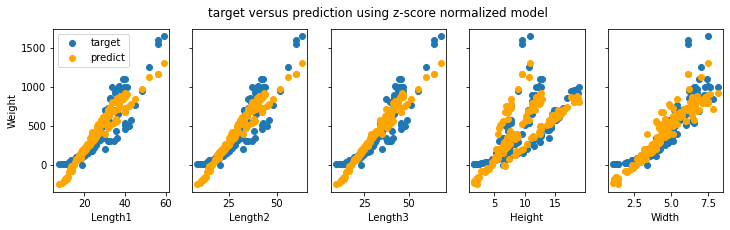

In [72]:
fig,ax=plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_input.iloc[:,i],y_target, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_input.iloc[:,i],y_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Weight")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

we plot the prediction(orange) vs the target(blue) using subplot 

# Thank you 